导入相应的包

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Conv2D,MaxPooling2D,Flatten, Dropout, Input

In [2]:
# 加载数据集
(image_train, label_train), (image_test, label_test) = fashion_mnist.load_data()

In [3]:
# 根据数据集的类别定义好标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

进行数据规范化之前，先将图像数据的数据类型转换为浮点数，以防止除法运算时发生整数除法
然后将 image_train 和 image_test 中的所有像素值都除以255，使它们的范围变为0到1

In [4]:
#数据规范化
image_train = image_train.astype('float32')
image_test = image_test.astype('float32')
image_train = image_train / 255.0
image_test = image_test / 255.0

将二维数据转化为一维数据

In [5]:
image_train = image_train.reshape(-1, 28*28)
image_test = image_test.reshape(-1, 28*28)

规定训练集的数量

In [6]:
image_train = image_train[:5000]
image_test = image_test[:5000]
label_train = label_train[:5000]
label_test = label_test[:5000]

定义一个神经网络模型，将准确率作为评价标准

In [7]:
model = Sequential()#创建模型
model.add(Input(shape=(784,)))#输入层
model.add(Dense(784))
model.add(Reshape((28, 28, 1)))#转换为二维图像
model.add(Conv2D(32, (3, 3), activation='relu'))  #卷积层
model.add(MaxPooling2D(pool_size=(3, 3)))  #池化层
model.add(Flatten())#展开
model.add(Dense(10, activation='softmax'))#输出层
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])#编译模型

In [8]:
#训练模型
model.fit(image_train, label_train, epochs=10, batch_size=32)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6156 - loss: 1.1599
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.5702
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8166 - loss: 0.5193
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8549 - loss: 0.4300
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3972
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8819 - loss: 0.3382
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8757 - loss: 0.3474
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8875 - loss: 0.2989
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8973 - loss: 0.2803
Epoch 10/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9074 - loss: 0.2539


In [9]:
# 评估模型
loss, accuracy = model.evaluate(image_test, label_test)
print('test loss:', loss)
print('test accuracy:', accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8360 - loss: 0.4594
test loss: 0.4999327063560486
test accuracy: 0.8294000029563904


In [10]:
# 做预测
predictions = model.predict(image_test)
predictions = np.argmax(predictions, axis=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
# 计算准确率和召回率
accuracy = accuracy_score(label_test, predictions)
recall = recall_score(label_test, predictions, average='macro')

In [12]:
# 初始化列表以保存准确率和召回率
accuracy_list = []
recall_list = []

In [13]:
#寻找最高准确率的k值
k = 0
max_accuracy = 0
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(image_train, label_train)
    predictions = model.predict(image_test)
    accuracy = accuracy_score(label_test, predictions)
    accuracy_list.append(accuracy)  # 保存准确率
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        k = i
print('最高准确率的k值:', k)


最高准确率的k值: 4


In [14]:
#寻找最高召回率的k值
k = 0
max_recall = 0
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(image_train, label_train)
    predictions = model.predict(image_test)
    recall = recall_score(label_test, predictions, average='macro')
    recall_list.append(recall)  # 保存召回率
    if recall > max_recall:
        max_recall = recall
        k = i
print('最高召回率的k值:', k)


最高召回率的k值: 4


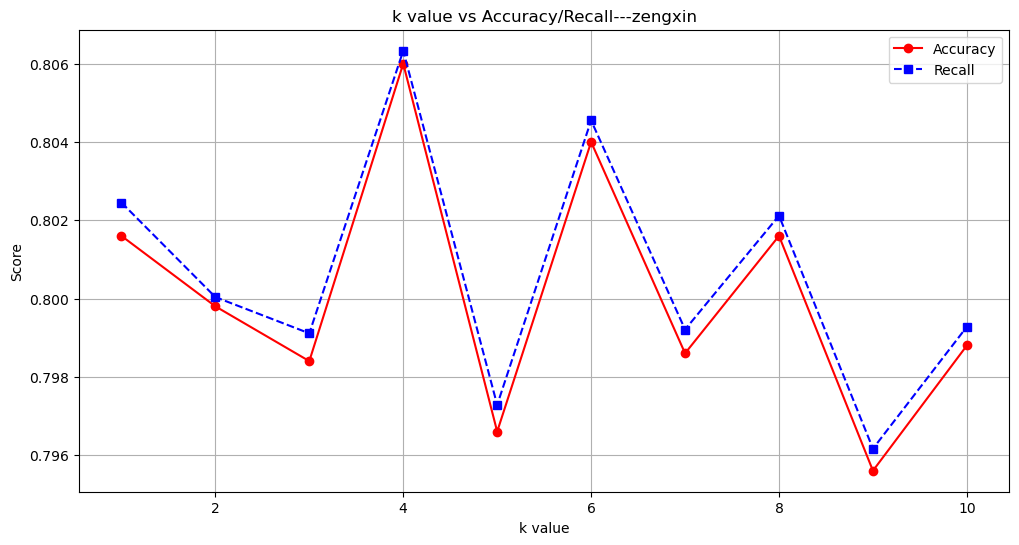

In [15]:
# 绘制k值与准确率和召回率的关系
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), accuracy_list, marker='o', linestyle='-', color='r', label='Accuracy')
plt.plot(range(1, 11), recall_list, marker='s', linestyle='--', color='b', label='Recall')
plt.xlabel('k value')
plt.ylabel('Score')
plt.title('k value vs Accuracy/Recall---zengxin')
plt.legend()
plt.grid()  
plt.show()

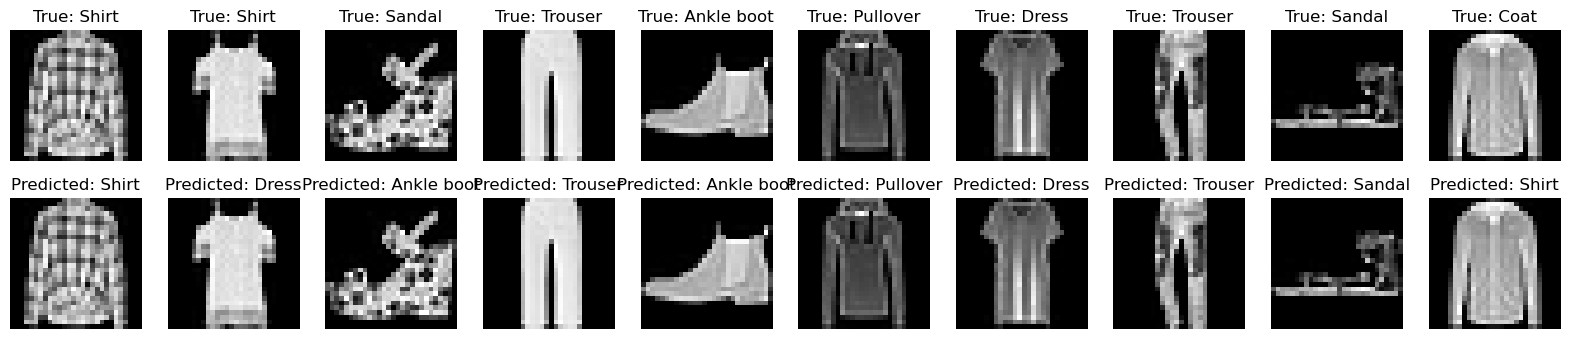

In [16]:
#可视化展示预测结果
n = 10
random = np.random.choice(range(len(image_test)), size=n, replace=False)

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    image = image_test[random[i]].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {class_names[label_test[random[i]]]}")
    plt.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {class_names[predictions[random[i]]]}")
    plt.axis('off')
plt.show()